<a href="https://colab.research.google.com/github/cvillarr123/trading/blob/master/notebook/balance_v001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/chrisconlan/algorithmic-trading-with-python.git


Cloning into 'algorithmic-trading-with-python'...
remote: Enumerating objects: 341, done.
remote: Counting objects: 100% (341/341), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 341 (delta 44), reused 312 (delta 24), pack-reused 0
Receiving objects: 100% (341/341), 4.83 MiB | 17.24 MiB/s, done.
Resolving deltas: 100% (44/44), done.


# Nueva sección

# Nueva sección

In [2]:
!pip install bt

     |████████████████████████████████| 2.7MB 4.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for bt: filename=bt-0.2.9-cp37-cp37m-linux_x86_64.whl size=765274 sha256=de538784025d77f3b1b8e8e81b0dc5633e1f5002e803eab26a17023a9def1f17
  Stored in directory: /root/.cache/pip/wheels/18/2a/31/ead0e40a43116c3278ea50bdec622d43c9e51263b8a62ad71c
Successfully built bt


In [3]:
!pip install alpha_vantage

     |████████████████████████████████| 1.3MB 4.7MB/s 
     |████████████████████████████████| 143kB 24.3MB/s 
     |████████████████████████████████| 296kB 24.1MB/s 


In [4]:
!pip install alpha_vantage pandas

In [5]:
!pip install plotly==5.0.0

     |████████████████████████████████| 19.1MB 2.0MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [6]:
!pip install chart-studio

     |████████████████████████████████| 71kB 2.6MB/s 


In [7]:
!pip install pandas_ta
#https://github.com/twopirllc/pandas-ta#stable


     |████████████████████████████████| 92kB 1.9MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.2.45b0-cp37-none-any.whl size=175305 sha256=051bff569f046ea6968cd985e15ee053cf0730f14edce153210b5c9a2c14e5e5
  Stored in directory: /root/.cache/pip/wheels/78/76/74/e4b09c98fc91d7e1e0a56f4fe067796f216deacaa509234579
Successfully built pandas-ta


In [8]:
%cd algorithmic-trading-with-python/src/

/content/algorithmic-trading-with-python/src


In [9]:
!ls

bootstrap_portfolio.py	       pypm
fit_alternative_data_model.py  simulate_alternative_data_portfolio.py
__init__.py		       simulate_portfolio.py
optimize_portfolio.py	       white_noise_portfolio.py


In [10]:
import sys
sys.path.insert(0, '/content/algorithmic-trading-with-python/src/pypm')

**Librerias a usar para graficas e indicadores**

In [11]:

import pypm
from pypm import metrics
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
# Make plots bigger
import datetime
import numpy as np
import plotly.graph_objs as go
import plotly as py



import plotly.express as px
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

pd.set_option('max_colwidth', 400)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#metrics.calculate_calmar_ratio

In [ ]:
def line_range(df,x_col,y_col,range_x_values,title_msg, hide_weekends,especial_dates, hide_especial_dates) :
  df_trunc = df.copy()
  fig = px.line(df_trunc, x=x_col, y=y_col, range_x=range_x_values, title=title_msg)
  if (hide_weekends) :
    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]) #, #hide weekends
        ]
    )
  else :
    if (hide_especial_dates) :
      fig.update_xaxes(
          rangebreaks=[
              dict(bounds=["sat", "mon"]), #, #hide weekends
              dict(values=especial_dates)  # hide Christmas and New Year's
          ]
      )
  fig.show()

In [93]:
def lines_plot(dfs,x_cols,y_cols,line_colors,title_msg, hide_weekends,especial_dates, hide_especial_dates) :


    layout = go.Layout(
        xaxis=dict(rangebreaks=[
            dict(bounds=["sat", "mon"])#, # hide weekends
            ],
        ),
        title=go.layout.Title(text=title_msg)   
    )

    fig = go.Figure()

    for i in range(len(dfs)):
        fig.add_trace(go.Scatter(x=dfs[i][x_cols[i]], y=dfs[i][y_cols[i]], mode='lines', name=x_cols[i] ,line=dict(color=line_colors[i])))


    if (hide_weekends) :
      fig.update_xaxes(
          rangebreaks=[
              dict(bounds=["sat", "mon"]) #, #hide weekends
          ]
      )
    else :
      if (hide_especial_dates) :
        fig.update_xaxes(
            rangebreaks=[
                dict(bounds=["sat", "mon"]), #, #hide weekends
                dict(values=especial_dates)  # hide Christmas and New Year's
            ]
        )

    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]) #, #hide weekends
        ]
    )

    fig.show()

In [12]:
#para dibujar solo velas
def drawCandleStick(data):
    candlestick = go.Candlestick(
        x = data.index,
        open = data['open'],
        high = data['high'], 
        low = data['low'],
        close = data['close']
    )
    # create a plot
    fig.update_xaxes(
        rangebreaks=[
            dict(bounds=["sat", "mon"]) #, #hide weekends
            #dict(values=["2021-06-16", "2021-06-06"])  # hide Christmas and New Year's
        ]
    )
    fig = go.Figure(data=[candlestick])
    fig.show()

In [13]:
fromD = 'GBP'
toD='AUD'
# **Ver el precio de intercambio al cierre**

from alpha_vantage.foreignexchange import ForeignExchange
from pprint import pprint
cc = ForeignExchange(key='1035HSNE5D7XWHLM',output_format='pandas')

# There is no metadata in this call
data_exchange_rate, meta_exchange_rate = cc.get_currency_exchange_rate(from_currency=fromD,to_currency=toD)

#data_exchange_rate.head(5)




In [ ]:
#pd_filtro_diario=data_daily[ (data_daily.TradeDate  >= pd.to_datetime('2021-02-01', format='%Y-%m-%d')) & ( data_daily.TradeDate  < pd.to_datetime('2021-06-21', format='%Y-%m-%d')) ]
#pd_filtro_diario.head()

In [14]:
# para analisis diario
columns = ['open','high','low','close']

data_daily, meta_daily = cc.get_currency_exchange_daily ( 'GBP','AUD',outputsize='compact')

data_daily.columns = columns
data_daily.sort_index(ascending=True,inplace=True)
data_daily["TradeDate"] = data_daily.index.date
data_daily.TradeDate = pd.to_datetime(data_daily.TradeDate, format='%Y-%m-%d')

data_daily.reset_index(drop=True,inplace=True)
data_daily.dtypes

open                float64
high                float64
low                 float64
close               float64
TradeDate    datetime64[ns]
dtype: object

In [15]:
data_daily.head()

,open,high,low,close,TradeDate
0,1.78328,1.78943,1.78189,1.78633,2021-02-15
1,1.78608,1.79432,1.78523,1.79122,2021-02-16
2,1.79141,1.79666,1.78582,1.78744,2021-02-17
3,1.78628,1.80236,1.78473,1.79829,2021-02-18
4,1.79839,1.79941,1.77803,1.77938,2021-02-19


In [16]:
np.max(data_daily.TradeDate)

Timestamp('2021-07-02 00:00:00')

In [17]:
np.min(data_daily.TradeDate)

Timestamp('2021-02-15 00:00:00')

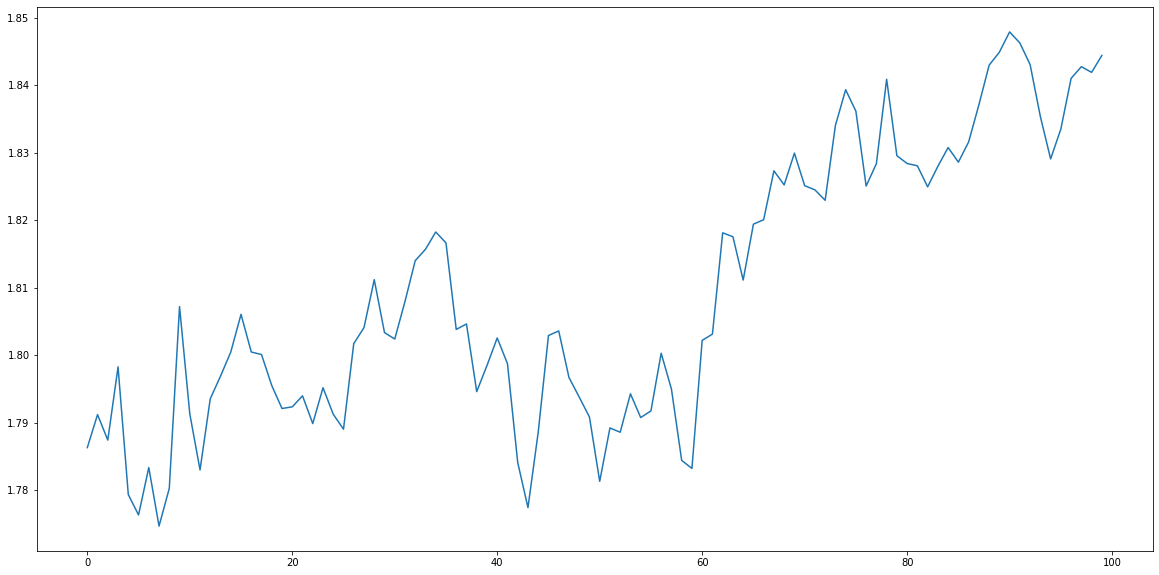

In [18]:
plt.plot(data_daily["close"])

In [19]:

# para analisis mensual

data_monthly, meta_monthly = cc.get_currency_exchange_monthly('GBP','AUD',outputsize='compact')

In [76]:
data_monthly.columns = columns
data_monthly.sort_index(ascending=False,inplace=True)
data_monthly.head(5)

,open,high,low,close
date,,,,
2021-07-02,1.84273,1.84719,1.83908,1.84440
2021-06-30,1.83636,1.85237,1.81909,1.84274
2021-05-31,1.78958,1.84236,1.78024,1.83614
2021-04-30,1.81441,1.82650,1.77372,1.79078
2021-03-31,1.80520,1.81595,1.78057,1.81402


In [83]:
line_range(data_monthly,data_monthly.index,data_monthly.close,['2019-01-01','2021-07-02'],'Closes '+titulo,True,['2021-06-02'],False)

In [20]:

# Ver el intraday para el calculo de banderas

data_intraday, meta_intraday = cc.get_currency_exchange_intraday('GBP','AUD',interval='15min',outputsize='full')

data_intraday.columns = columns
data_intraday.sort_index(ascending=True,inplace=True)
data_intraday['TradeDate'] = data_intraday.index.date 


data_intraday['time'] = data_intraday.index.time
data_intraday["date"] = data_intraday.index.to_pydatetime()

format = '%Y-%m-%d %H:%M:%S'

data_intraday['date'] = pd.to_datetime(data_intraday.date, format=format)
data_intraday = data_intraday.set_index(pd.DatetimeIndex(data_intraday['date']))

data_daily.sort_index(ascending=True,inplace=True)

data_intraday.reset_index(drop=True,inplace=True)

#data_intraday.set_index('date',inplace=True)



data_intraday.head(10)

,open,high,low,close,TradeDate,time,date
0,1.84369,1.84413,1.84316,1.84380,2021-06-17,19:30:00,2021-06-17 19:30:00
1,1.84378,1.84443,1.84331,1.84417,2021-06-17,19:45:00,2021-06-17 19:45:00
2,1.84431,1.84467,1.84366,1.84424,2021-06-17,20:00:00,2021-06-17 20:00:00
3,1.84426,1.84459,1.84382,1.84429,2021-06-17,20:15:00,2021-06-17 20:15:00
4,1.84428,1.84473,1.84371,1.84454,2021-06-17,20:30:00,2021-06-17 20:30:00
5,1.84452,1.84453,1.84365,1.84388,2021-06-17,20:45:00,2021-06-17 20:45:00
6,1.84398,1.84428,1.84080,1.84101,2021-06-17,21:00:00,2021-06-17 21:00:00
7,1.84119,1.84390,1.84119,1.84305,2021-06-17,21:15:00,2021-06-17 21:15:00
8,1.84308,1.84360,1.84127,1.84288,2021-06-17,21:30:00,2021-06-17 21:30:00
9,1.84238,1.84337,1.84202,1.84246,2021-06-17,21:45:00,2021-06-17 21:45:00


In [21]:
titulo='Prices:' + fromD + '-' + toD

In [22]:
data_intraday.dtypes

open                float64
high                float64
low                 float64
close               float64
TradeDate            object
time                 object
date         datetime64[ns]
dtype: object

In [23]:
data_intraday.head(10)

,open,high,low,close,TradeDate,time,date
0,1.84369,1.84413,1.84316,1.84380,2021-06-17,19:30:00,2021-06-17 19:30:00
1,1.84378,1.84443,1.84331,1.84417,2021-06-17,19:45:00,2021-06-17 19:45:00
2,1.84431,1.84467,1.84366,1.84424,2021-06-17,20:00:00,2021-06-17 20:00:00
3,1.84426,1.84459,1.84382,1.84429,2021-06-17,20:15:00,2021-06-17 20:15:00
4,1.84428,1.84473,1.84371,1.84454,2021-06-17,20:30:00,2021-06-17 20:30:00
5,1.84452,1.84453,1.84365,1.84388,2021-06-17,20:45:00,2021-06-17 20:45:00
6,1.84398,1.84428,1.84080,1.84101,2021-06-17,21:00:00,2021-06-17 21:00:00
7,1.84119,1.84390,1.84119,1.84305,2021-06-17,21:15:00,2021-06-17 21:15:00
8,1.84308,1.84360,1.84127,1.84288,2021-06-17,21:30:00,2021-06-17 21:30:00
9,1.84238,1.84337,1.84202,1.84246,2021-06-17,21:45:00,2021-06-17 21:45:00


In [24]:
#omitir las fechas de fin de semana
data_intraday = data_intraday[data_intraday.date.dt.dayofweek < 5 ]

In [25]:
data_descartar = data_intraday[data_intraday.date.dt.dayofweek >= 5 ]['close'] + 1
data_descartar

Series([], Name: close, dtype: float64)

In [26]:
data_descartar.head(1)

Series([], Name: close, dtype: float64)

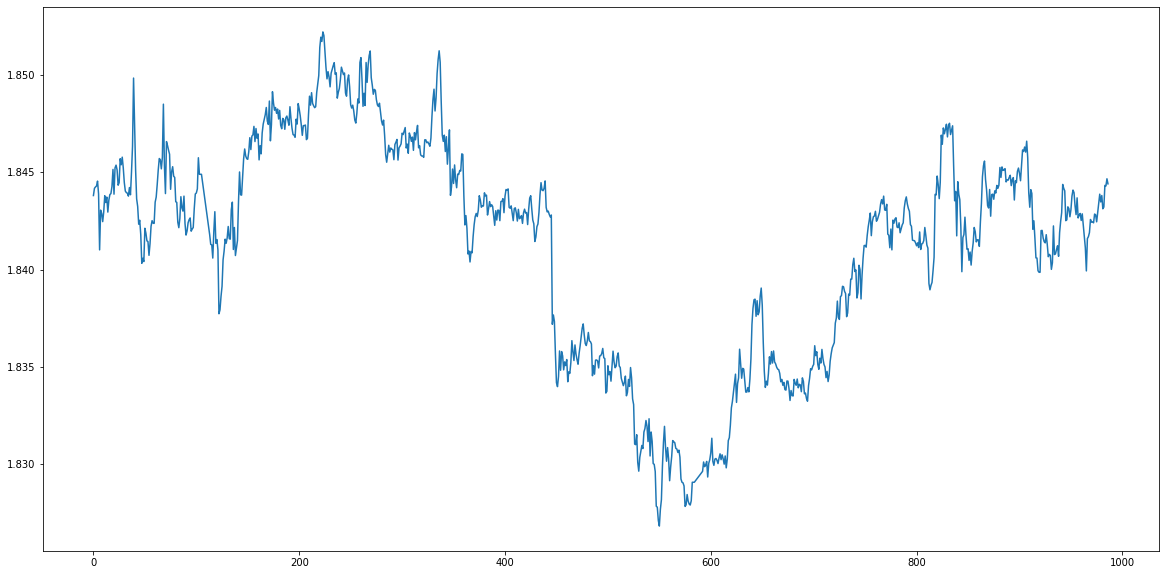

In [27]:
plt.plot(data_intraday["close"])

In [28]:
data_intraday.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-17,1.84080,1.84473
2021-06-18,1.83955,1.85022
2021-06-21,1.83655,1.84955
2021-06-22,1.84411,1.85237
2021-06-23,1.83979,1.85201
2021-06-24,1.83301,1.84552
2021-06-25,1.82580,1.83605
2021-06-28,1.82874,1.83971
2021-06-29,1.83267,1.84394


In [29]:
pd_fechas_total = pd.date_range(start=data_intraday.TradeDate.min() , end= data_intraday.TradeDate.max())
type(pd_fechas_total)

pandas.core.indexes.datetimes.DatetimeIndex

In [30]:
pd_fechas_total.to_list()

[Timestamp('2021-06-17 00:00:00', freq='D'),
 Timestamp('2021-06-18 00:00:00', freq='D'),
 Timestamp('2021-06-19 00:00:00', freq='D'),
 Timestamp('2021-06-20 00:00:00', freq='D'),
 Timestamp('2021-06-21 00:00:00', freq='D'),
 Timestamp('2021-06-22 00:00:00', freq='D'),
 Timestamp('2021-06-23 00:00:00', freq='D'),
 Timestamp('2021-06-24 00:00:00', freq='D'),
 Timestamp('2021-06-25 00:00:00', freq='D'),
 Timestamp('2021-06-26 00:00:00', freq='D'),
 Timestamp('2021-06-27 00:00:00', freq='D'),
 Timestamp('2021-06-28 00:00:00', freq='D'),
 Timestamp('2021-06-29 00:00:00', freq='D'),
 Timestamp('2021-06-30 00:00:00', freq='D'),
 Timestamp('2021-07-01 00:00:00', freq='D'),
 Timestamp('2021-07-02 00:00:00', freq='D')]

In [31]:
data_intraday.TradeDate.unique()


array([datetime.date(2021, 6, 17), datetime.date(2021, 6, 18),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 6, 30),
       datetime.date(2021, 7, 1), datetime.date(2021, 7, 2)], dtype=object)

In [32]:

dt_breaks = [d for d in pd_fechas_total.to_list() if not d in data_intraday.TradeDate.unique()]

In [33]:
dt_breaks

[Timestamp('2021-06-19 00:00:00', freq='D'),
 Timestamp('2021-06-20 00:00:00', freq='D'),
 Timestamp('2021-06-26 00:00:00', freq='D'),
 Timestamp('2021-06-27 00:00:00', freq='D')]

In [34]:
data_intraday.dtypes
data_intraday.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            977, 978, 979, 980, 981, 982, 983, 984, 985, 986],
           dtype='int64', length=973)

In [35]:
data_intraday.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-06-17,1.84080,1.84473
2021-06-18,1.83955,1.85022
2021-06-21,1.83655,1.84955
2021-06-22,1.84411,1.85237
2021-06-23,1.83979,1.85201
2021-06-24,1.83301,1.84552
2021-06-25,1.82580,1.83605
2021-06-28,1.82874,1.83971
2021-06-29,1.83267,1.84394


In [36]:
# busca en que registro (fecha completa hora min seg) se dio el precio minimo para ese dia,
# se lo puede verificar con el dato proporcionado antes
data_intraday.loc[data_intraday.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,TradeDate,time,date
6,1.84398,1.84428,1.84080,1.84101,2021-06-17,21:00:00,2021-06-17 21:00:00
49,1.84055,1.84089,1.83955,1.84041,2021-06-18,07:45:00,2021-06-18 07:45:00
123,1.83774,1.83822,1.83655,1.83793,2021-06-21,02:30:00,2021-06-21 02:30:00
296,1.84594,1.84743,1.84411,1.84562,2021-06-22,21:45:00,2021-06-22 21:45:00
367,1.84041,1.84122,1.83979,1.84093,2021-06-23,15:30:00,2021-06-23 15:30:00
450,1.83566,1.83578,1.83301,1.83419,2021-06-24,12:15:00,2021-06-24 12:15:00
551,1.82681,1.82792,1.82580,1.82769,2021-06-25,13:30:00,2021-06-25 13:30:00
597,1.83011,1.83025,1.82874,1.82935,2021-06-28,01:15:00,2021-06-28 01:15:00
694,1.83338,1.83381,1.83267,1.83324,2021-06-29,01:30:00,2021-06-29 01:30:00
813,1.83929,1.83992,1.83796,1.83896,2021-06-30,07:15:00,2021-06-30 07:15:00


In [37]:
# busca en que registro (fecha completa hora min seg) se dio el precio maximo para ese dia,
# se lo puede verificar con el dato proporcionado antes
data_intraday.loc[data_intraday.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,TradeDate,time,date
4,1.84428,1.84473,1.84371,1.84454,2021-06-17,20:30:00,2021-06-17 20:30:00
40,1.84986,1.85022,1.84725,1.84742,2021-06-18,05:30:00,2021-06-18 05:30:00
176,1.84855,1.84955,1.84745,1.84818,2021-06-21,15:45:00,2021-06-21 15:45:00
221,1.85132,1.85237,1.85095,1.85193,2021-06-22,03:00:00,2021-06-22 03:00:00
337,1.85123,1.85201,1.85059,1.85064,2021-06-23,08:00:00,2021-06-23 08:00:00
439,1.84415,1.84552,1.84405,1.84455,2021-06-24,09:30:00,2021-06-24 09:30:00
505,1.83507,1.83605,1.83480,1.83581,2021-06-25,02:00:00,2021-06-25 02:00:00
650,1.83905,1.83971,1.83781,1.83817,2021-06-28,14:30:00,2021-06-28 14:30:00
768,1.84331,1.84394,1.84296,1.84377,2021-06-29,20:00:00,2021-06-29 20:00:00
827,1.84733,1.84853,1.84651,1.84697,2021-06-30,10:45:00,2021-06-30 10:45:00


In [38]:
import pandas_ta as ta


In [39]:
# Calculate Returns and append to the df DataFrame
data_intraday.ta.log_return(cumulative=False, append=True,percent=True)
data_intraday.ta.percent_return(cumulative=False, append=True,percent=True)

# New Columns with results
data_intraday.columns

# Take a peek
data_intraday.head()



,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1
0,1.84369,1.84413,1.84316,1.84380,2021-06-17,19:30:00,2021-06-17 19:30:00,NaN,NaN
1,1.84378,1.84443,1.84331,1.84417,2021-06-17,19:45:00,2021-06-17 19:45:00,0.000201,0.000201
2,1.84431,1.84467,1.84366,1.84424,2021-06-17,20:00:00,2021-06-17 20:00:00,0.000038,0.000038
3,1.84426,1.84459,1.84382,1.84429,2021-06-17,20:15:00,2021-06-17 20:15:00,0.000027,0.000027
4,1.84428,1.84473,1.84371,1.84454,2021-06-17,20:30:00,2021-06-17 20:30:00,0.000136,0.000136


In [40]:
data_intraday["close_return"] = metrics.calculate_return_series(data_intraday.close)*100
data_intraday["close_log_return"] = metrics.calculate_log_return_series(data_intraday.close)*100

In [41]:
data_intraday.head()

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return
0,1.84369,1.84413,1.84316,1.84380,2021-06-17,19:30:00,2021-06-17 19:30:00,NaN,NaN,NaN,NaN
1,1.84378,1.84443,1.84331,1.84417,2021-06-17,19:45:00,2021-06-17 19:45:00,0.000201,0.000201,0.020067,0.020065
2,1.84431,1.84467,1.84366,1.84424,2021-06-17,20:00:00,2021-06-17 20:00:00,0.000038,0.000038,0.003796,0.003796
3,1.84426,1.84459,1.84382,1.84429,2021-06-17,20:15:00,2021-06-17 20:15:00,0.000027,0.000027,0.002711,0.002711
4,1.84428,1.84473,1.84371,1.84454,2021-06-17,20:30:00,2021-06-17 20:30:00,0.000136,0.000136,0.013555,0.013554


In [42]:
data_intraday['intra_return'] = data_intraday.close.pct_change()*100

In [43]:
data_intraday.head()

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return
0,1.84369,1.84413,1.84316,1.84380,2021-06-17,19:30:00,2021-06-17 19:30:00,NaN,NaN,NaN,NaN,NaN
1,1.84378,1.84443,1.84331,1.84417,2021-06-17,19:45:00,2021-06-17 19:45:00,0.000201,0.000201,0.020067,0.020065,0.020067
2,1.84431,1.84467,1.84366,1.84424,2021-06-17,20:00:00,2021-06-17 20:00:00,0.000038,0.000038,0.003796,0.003796,0.003796
3,1.84426,1.84459,1.84382,1.84429,2021-06-17,20:15:00,2021-06-17 20:15:00,0.000027,0.000027,0.002711,0.002711,0.002711
4,1.84428,1.84473,1.84371,1.84454,2021-06-17,20:30:00,2021-06-17 20:30:00,0.000136,0.000136,0.013555,0.013554,0.013555


In [95]:


df_trunc = data_intraday.copy()

fig = px.line(df_trunc, x='date', y='intra_return', range_x=['2021-06-22', '2021-07-01'], title='Retorno Porcentual precios:'+fromD + '-' + toD)

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)
fig.show()




Ver la variabilidad a traves de un histograma del retorno porcentual del precio de cierre

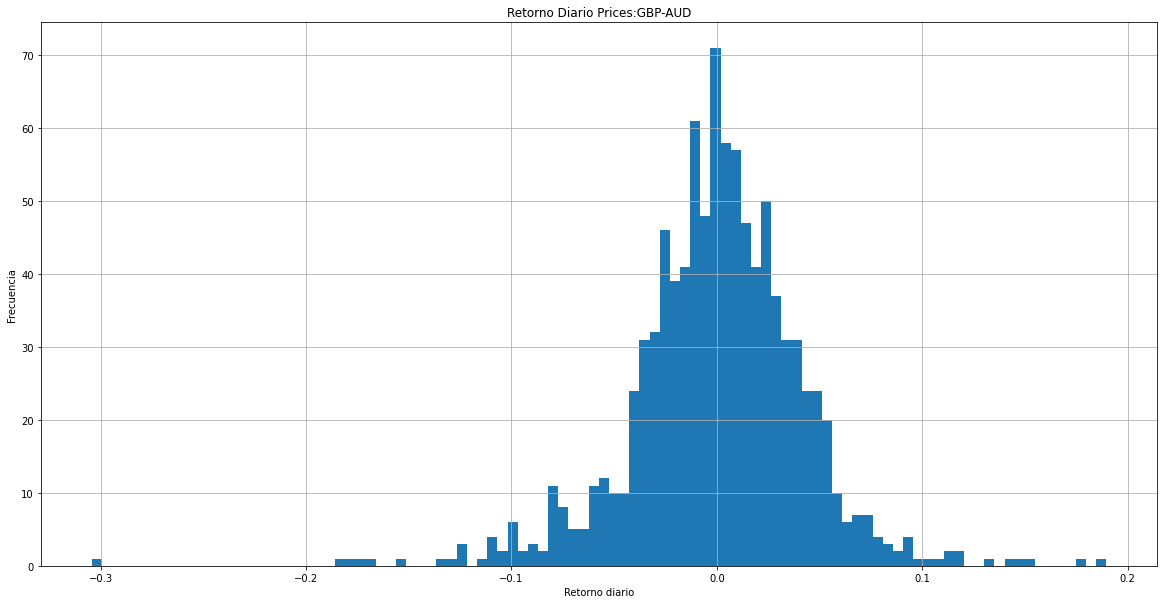

In [45]:
data_intraday['intra_return'].hist(bins=100)
plt.ylabel('Frecuencia')
plt.xlabel('Retorno diario')
plt.title('Retorno Diario '+titulo)
plt.show()

In [46]:
# si quisiera hacer un resample de intraday a dia
resample_diary = data_intraday.set_index('date').resample('D').mean()
resample_diary.head(5)
resample_weekly = data_intraday.set_index('date').resample('W').mean()
resample_weekly.head(5)


,open,high,low,close,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return
date,,,,,,,,,
2021-06-20,1.843831,1.844581,1.842873,1.843833,0.000006,0.000006,0.000578,0.000563,0.000578
2021-06-27,1.842150,1.842756,1.841233,1.842109,-0.000018,-0.000018,-0.001814,-0.001823,-0.001814
2021-07-04,1.839718,1.840328,1.838877,1.839732,0.000021,0.000021,0.002119,0.002112,0.002119


In [47]:
data_intraday['MVS50']=data_intraday['close'].rolling(window=50).mean()

In [48]:
#MVS30 = pd.DataFrame()
#MVS30['close']=market['close'].rolling(window=30).mean()
data_intraday['MVS30']=data_intraday['close'].rolling(window=30).mean()

In [49]:
#MVS30[MVS30.close.notna()].head()

In [50]:
#MVS100 = pd.DataFrame()
#MVS100['close']=market['close'].rolling(window=100).mean()
data_intraday['MVS100']=data_intraday['close'].rolling(window=100).mean()

In [ ]:
#def lines_plot(dfs,x_cols,y_cols,line_colors,title_msg, hide_weekends,especial_dates, hide_especial_dates) :

de


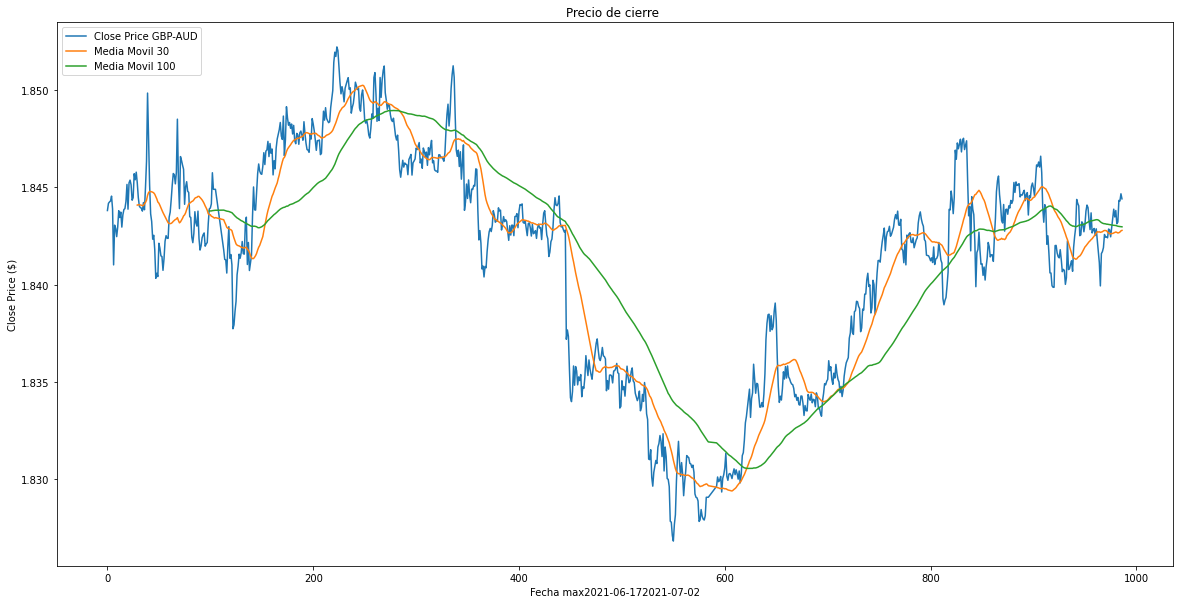

In [51]:
plt.figure()
plt.plot(data_intraday['close'], label = 'Close Price GBP-AUD')
plt.plot(data_intraday['MVS30'], label = 'Media Movil 30')
plt.plot(data_intraday['MVS100'], label = 'Media Movil 100')
plt.title('Precio de cierre '  )
plt.xlabel( 'Fecha max' +  str( np.min(data_intraday.TradeDate) ) + str(np.max(data_intraday.TradeDate)  ))
plt.ylabel('Close Price ($)')
plt.legend(loc='upper left')
plt.show()


In [58]:
str(np.min(data_daily.TradeDate) )

'2021-02-15 00:00:00'

In [59]:
str(np.max(data_daily.TradeDate) )


'2021-07-02 00:00:00'

In [60]:

data_intraday['MVS10'] = ta.sma(data_intraday["close"], length=10)
data_intraday.tail(6)

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return,MVS50,MVS30,MVS100,MVS10
981,1.84380,1.84424,1.84266,1.84312,2021-07-02,01:15:00,2021-07-02 01:15:00,-0.000369,-0.000369,-0.036880,-0.036887,-0.036880,1.842565,1.842677,1.843010,1.843108
982,1.84305,1.84354,1.84240,1.84321,2021-07-02,01:30:00,2021-07-02 01:30:00,0.000049,0.000049,0.004883,0.004883,0.004883,1.842622,1.842648,1.842995,1.843189
983,1.84321,1.84442,1.84279,1.84432,2021-07-02,01:45:00,2021-07-02 01:45:00,0.000602,0.000602,0.060221,0.060203,0.060221,1.842664,1.842660,1.842985,1.843336
984,1.84437,1.84472,1.84331,1.84429,2021-07-02,02:00:00,2021-07-02 02:00:00,-0.000016,-0.000016,-0.001627,-0.001627,-0.001627,1.842734,1.842694,1.842977,1.843484
985,1.84430,1.84483,1.84387,1.84466,2021-07-02,02:15:00,2021-07-02 02:15:00,0.000201,0.000201,0.020062,0.020060,0.020062,1.842811,1.842756,1.842972,1.843705
986,1.84466,1.84482,1.84376,1.84440,2021-07-02,02:30:00,2021-07-02 02:30:00,-0.000141,-0.000141,-0.014095,-0.014096,-0.014095,1.842878,1.842780,1.842965,1.843852


In [61]:
def senal(data, columna_analisis1, columna_analisis2):
    compra = []
    venta = []
    condicion = 0
    
    for dia in range(len(data)):
        
        if data[columna_analisis1][dia] > data[columna_analisis2][dia]:
            if condicion != 1:
                compra.append(data['close'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
            
        elif data[columna_analisis1][dia] < data[columna_analisis2][dia]:
            if condicion != -1:
                venta.append(data['close'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
            
    return (compra, venta)

In [62]:
senales = senal(data_intraday.set_index('date'),'MVS30','MVS100')
data_intraday['PosibleCompra'] = senales[0]
data_intraday['PosibleVenta'] = senales[1]
data_intraday[data_intraday.MVS100.notna()].head(3)

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return,MVS50,MVS30,MVS100,MVS10,PosibleCompra,PosibleVenta
99,1.84313,1.84389,1.84254,1.84388,2021-06-18,20:15:00,2021-06-18 20:15:00,0.000401,0.000401,0.040149,0.040141,0.040149,1.843576,1.843587,1.843778,1.842459,NaN,1.84388
100,1.84389,1.84423,1.84313,1.84393,2021-06-18,20:30:00,2021-06-18 20:30:00,0.000027,0.000027,0.002712,0.002712,0.002712,1.843612,1.843588,1.843780,1.842675,NaN,NaN
101,1.84399,1.84464,1.84353,1.84414,2021-06-18,20:45:00,2021-06-18 20:45:00,0.000114,0.000114,0.011389,0.011388,0.011389,1.843658,1.843507,1.843779,1.842891,NaN,NaN


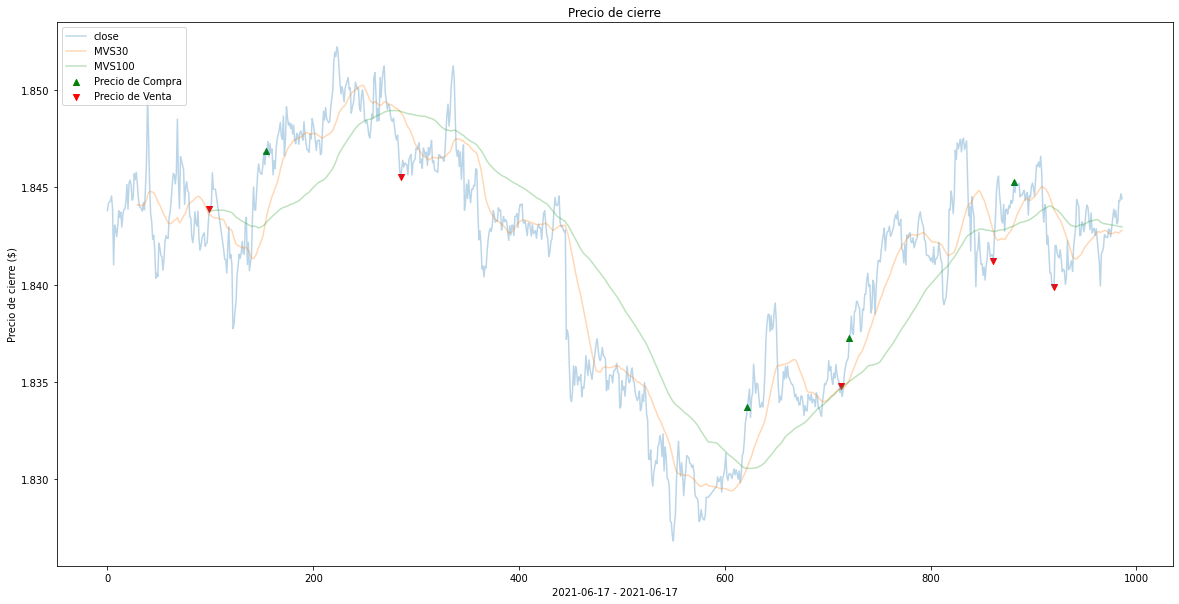

In [63]:
plt.figure()
plt.plot(data_intraday['close'], label = 'close', alpha = 0.3)
plt.plot(data_intraday['MVS30'], label = 'MVS30', alpha = 0.3)
plt.plot(data_intraday['MVS100'], label = 'MVS100', alpha = 0.3)
plt.scatter(data_intraday.index, data_intraday['PosibleCompra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(data_intraday.index, data_intraday['PosibleVenta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Precio de cierre')
plt.xlabel( str(np.min(data_intraday.TradeDate) ) + ' - ' +  str(np.min(data_intraday.TradeDate) ))
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

In [64]:
import chart_studio as ch

In [65]:
data_intraday["TimeDate"] = data_intraday.index
data_intraday.head(2)


,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return,MVS50,MVS30,MVS100,MVS10,PosibleCompra,PosibleVenta,TimeDate
0,1.84369,1.84413,1.84316,1.84380,2021-06-17,19:30:00,2021-06-17 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.84378,1.84443,1.84331,1.84417,2021-06-17,19:45:00,2021-06-17 19:45:00,0.000201,0.000201,0.020067,0.020065,0.020067,NaN,NaN,NaN,NaN,NaN,NaN,1


In [66]:


df_long=pd.melt(data_intraday, id_vars=['TimeDate','date'], value_vars=['MVS30', 'MVS100'])


df_long.head(3)

,TimeDate,date,variable,value
0,0,2021-06-17 19:30:00,MVS30,NaN
1,1,2021-06-17 19:45:00,MVS30,NaN
2,2,2021-06-17 20:00:00,MVS30,NaN


In [67]:
# plotly 
df_long.rename(columns={'value': 'Prices'})
etiqueta_titulo='Prices:' + fromD + '/' +  toD
fig = px.line(df_long, x='date', y='value', color='variable', title= etiqueta_titulo )

# Show plot 
fig.show()

In [68]:
df=data_intraday.copy()
#df.set_index('date',inplace=True)
print('done')
titulo='Prices:' + fromD + '-' + toD




done


In [69]:
df.head(2)

,open,high,low,close,TradeDate,time,date,LOGRET_1,PCTRET_1,close_return,close_log_return,intra_return,MVS50,MVS30,MVS100,MVS10,PosibleCompra,PosibleVenta,TimeDate
0,1.84369,1.84413,1.84316,1.84380,2021-06-17,19:30:00,2021-06-17 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.84378,1.84443,1.84331,1.84417,2021-06-17,19:45:00,2021-06-17 19:45:00,0.000201,0.000201,0.020067,0.020065,0.020067,NaN,NaN,NaN,NaN,NaN,NaN,1


PARA IMPRIMIR VELAS SIN EL RANGO DE FECHAS DE FIN DE SEMANA

In [70]:


df_trunc = df.copy()



fig = px.line(df_trunc, x='date', y='close', range_x=['2021-06-11', '2021-06-25'], title=titulo)



fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
        #dict(values=["2021-06-16", "2021-06-06"])  # hide Christmas and New Year's
    ]
)
fig.show()
#fig = go.Figure(data=data)


In [92]:

layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        ],
    
    ),
    title=go.layout.Title(text="A Figure Specified By A Graph Object")   
)

trace = go.Candlestick(x=df_trunc.date, open=df_trunc.open, high=df_trunc.high, low=df_trunc.low, close=df_trunc.close,
                       name=titulo)

data = [trace]

fig = go.Figure(data=data,layout=layout)

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS30, mode='lines',  name='MVS30',line=dict(color='black')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS100, mode='lines',  name='MVS100',line=dict(color='blue')))

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
    ]
)

fig.show()
#py.offline.plot(fig, filename='USDCAD.html')

In [84]:

layout = go.Layout(
    xaxis=dict(rangebreaks=[
        dict(bounds=["sat", "mon"])#, # hide weekends
        #dict(values=["2015-12-25", "2016-01-01"]) # hide Christmas and New Year's
        ],
    )
)

fig = go.Figure(layout=layout)

fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS30, mode='lines',  name='MVS30',line=dict(color='black')))
fig.add_trace(go.Scatter(x=df_trunc.date, y=df_trunc.MVS100, mode='lines',  name='MVS100',line=dict(color='blue')))

fig.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]) #, #hide weekends
        #dict(values=["2021-06-16", "2021-06-06"])  # hide Christmas and New Year's
    ]
)

fig.show()

In [72]:
#para evaluar activos

# Download historical prices
bt_data = bt.get('fb, amzn, goog, nflx, aapl',
               start='2020-6-1', end='2020-12-1')
# Print the top five rows
print(bt_data.head())
# Define the strategy
bt_strategy = bt.Strategy('Trade_Weekly', 
                         [bt.algos.RunWeekly(),
                          bt.algos.SelectAll(),
                          bt.algos.WeighEqually(),
                          bt.algos.Rebalance()])
# Create a backtest
bt_test = bt.Backtest(bt_strategy, bt_data)
# Run the backtest
bt_res = bt.run(bt_test)
# Plot the test result
bt_res.plot(title="Backtest result")
plt.show()


NameError: ignored

In [ ]:
# Calculate 12-day EMA
stock_data['EMA_12'] = talib.EMA(stock_data['Close'], timeperiod=12)
# Calculate 26-day EMA
stock_data['EMA_26'] = talib.EMA(stock_data['Close'], timeperiod=26)

# Plot the EMAs with price
plt.plot(stock_data['EMA_12'], label='EMA_12')
plt.plot(stock_data['EMA_26'], label='EMA_26')
plt.plot(stock_data['Close'], label='Close')

# Customize and show the plot
plt.legend()
plt.title('EMAs')
plt.show()